In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import seaborn as sns
import datetime

# Questions
## Metadata
- `Date`: Is it a holiday? Do holidays have a greater attendance?
- `DayofWeek`: Is there greater attendance on weekends? Any particular day?
- `DayNight`: Do night games have greater attendance? Is there a best time? Could traffic be affecting this?
- `VistingTeamScore` and `HomeTeamScore`: Would average margin of victory/loss affect attendance?
- `VisitingTeamGameNumber`: Is early in the season, middle, or end have greater attendance?
- `HomeTeamGameNumber`: Is early in the season, middle, or end have greater attendance? Before or after all-star break?
- `NumberofOuts` and `LengthofGame`: How does length of game (min) and length of game in outs affect attendance? Do shorter games have longer attendance?
- `Park ID` does average temperature/climate of park affect attendance?

## Derived Features
- `Visiting team ranking` (find feature) effect on attendance?
- `Home team ranking` (find feature) effect on attendance?
- `VisitingTeam_StartingPitcher_Name` is all-star?
- `HomeTeam_StartingPitcher_Name` is all-star?
- How does number of all-stars affect attendance?
- How does average age of starting lineup affect attendance?
    - Try using `HomeTeam_Player_#_Name` and `VisitingTeam_Player_#_Name`

## Game Stats
- Visiting team offensive statistics?
- Visiting team pitching statistics?
- Visiting team defensive statistics?
- Home team offensive statistics?
- Home team pitching statistics?
- Home team defensive statistics?

In [2]:
DATA_PATH = Path('../../data')

In [3]:
df_features = pd.read_parquet(DATA_PATH.joinpath('processed', 'game_logs_standings.parquet'))

In [4]:
df_features.columns.tolist()

['Gm#',
 'Year',
 'Date',
 'Unnamed: 3',
 'Tm',
 'Unnamed: 5',
 'Opp',
 'W/L',
 'R',
 'RA',
 'Inn',
 'W-L',
 'HomeTeam_Rank',
 'GB',
 'Win',
 'Loss',
 'Save',
 'Time',
 'D/N',
 'Attendance_TRUTH_x',
 'HomeTeam_cLI',
 'Streak',
 'Orig. Scheduled',
 'At',
 'VisitingTeam',
 'HomeTeam',
 'HomeTeam_W',
 'HomeTeam_L',
 'HomeTeam_Streak_count',
 'VisitingTeam_W',
 'VisitingTeam_L',
 'VisitingTeam_Rank',
 'VisitingTeam_cLI',
 'VisitingTeam_Streak_count',
 'Attendance_TRUTH_y',
 'NumberofGames',
 'DayofWeek',
 'VisitingTeamLeague',
 'VisitingTeamGameNumber',
 'HomeTeamLeague',
 'HomeTeamGameNumber',
 'VistingTeamScore',
 'HomeTeamScore',
 'NumberofOuts',
 'DayNight',
 'BallParkID',
 'Attendance',
 'LengthofGame',
 'VisitingTeam_LineScore',
 'HomeTeam_LineScore',
 'VisitingTeamOffense_AtBats',
 'VisitingTeamOffense_Hits',
 'VisitingTeamOffense_Doubles',
 'VisitingTeamOffense_Triples',
 'VisitingTeamOffense_Homeruns',
 'VisitingTeamOffense_RBIs',
 'VisitingTeamOffense_SacrificeHits',
 'VisitingTe

Attendance_TRUTH_x                  0.996240
Attendance                          0.970231
HomeTeam_Rank                       0.310947
HomeTeam_cLI                        0.235791
HomeTeam_W                          0.174406
Inn                                 0.171497
HomeTeam_Player9_Position           0.106867
VisitingTeam_Player9_Position       0.103148
VisitingTeam_W                      0.084790
HomeTeam_Streak_count               0.080545
VisitingTeamGameNumber              0.072795
HomeTeamGameNumber                  0.072664
Gm#                                 0.072663
VisitingTeam_cLI                    0.065119
LengthofGame                        0.054975
HomeTeamOffense_Strickouts          0.054521
VisitingTeam_L                      0.054216
HomeTeamOffense_IntentionalWalks    0.049205
HomeTeamOffense_SacrificeHits       0.048582
HomeTeam_Player8_Position           0.042951
Name: Attendance_TRUTH_y, dtype: float64

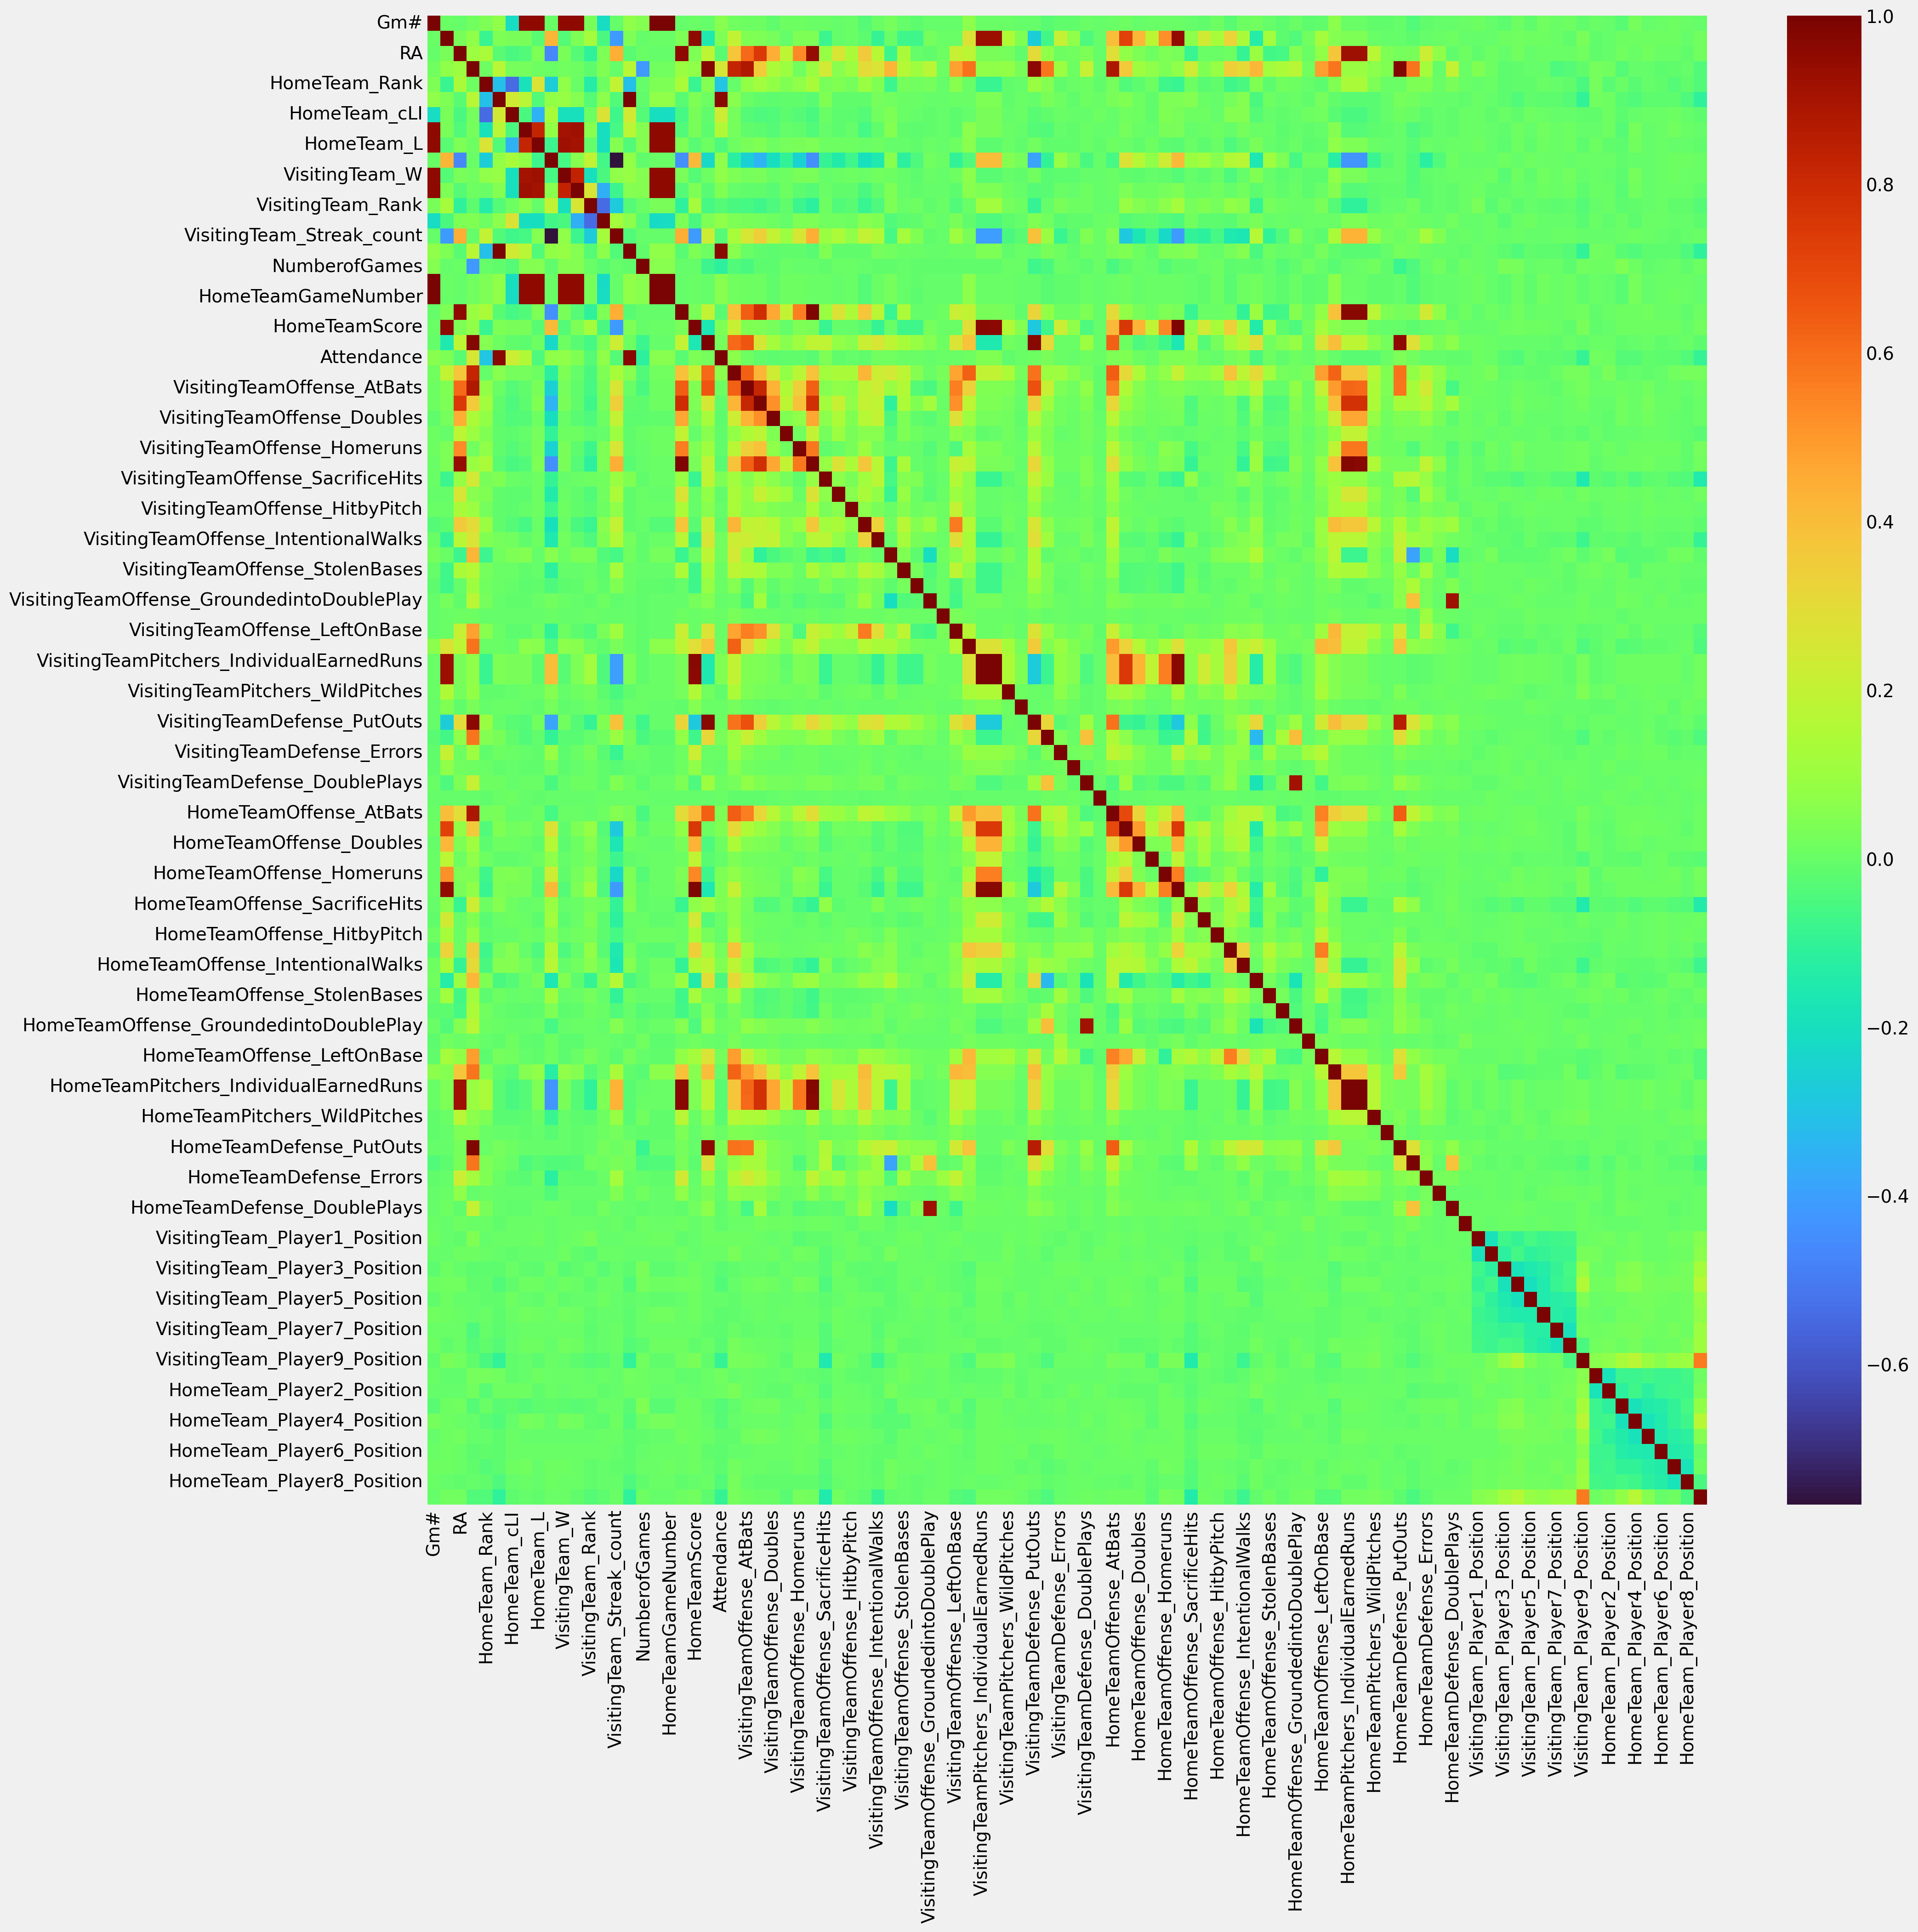

In [5]:
# pearson correlations
corr = df_features.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)
# filter by top 20 strongest pearson correlations with attendance excluding attendance with itself
display(corr.loc[corr.index != 'Attendance_TRUTH_y', 'Attendance_TRUTH_y'].abs().sort_values(ascending=False).iloc[:20])

In [6]:
p_correlated_features = corr.loc[corr.index != 'Attendance_TRUTH_y', 'Attendance_TRUTH_y'] \
                          .abs().sort_values(ascending=False).iloc[:20].index.to_numpy()
p_correlated_features

array(['Attendance_TRUTH_x', 'Attendance', 'HomeTeam_Rank',
       'HomeTeam_cLI', 'HomeTeam_W', 'Inn', 'HomeTeam_Player9_Position',
       'VisitingTeam_Player9_Position', 'VisitingTeam_W',
       'HomeTeam_Streak_count', 'VisitingTeamGameNumber',
       'HomeTeamGameNumber', 'Gm#', 'VisitingTeam_cLI', 'LengthofGame',
       'HomeTeamOffense_Strickouts', 'VisitingTeam_L',
       'HomeTeamOffense_IntentionalWalks',
       'HomeTeamOffense_SacrificeHits', 'HomeTeam_Player8_Position'],
      dtype=object)

<Axes: >

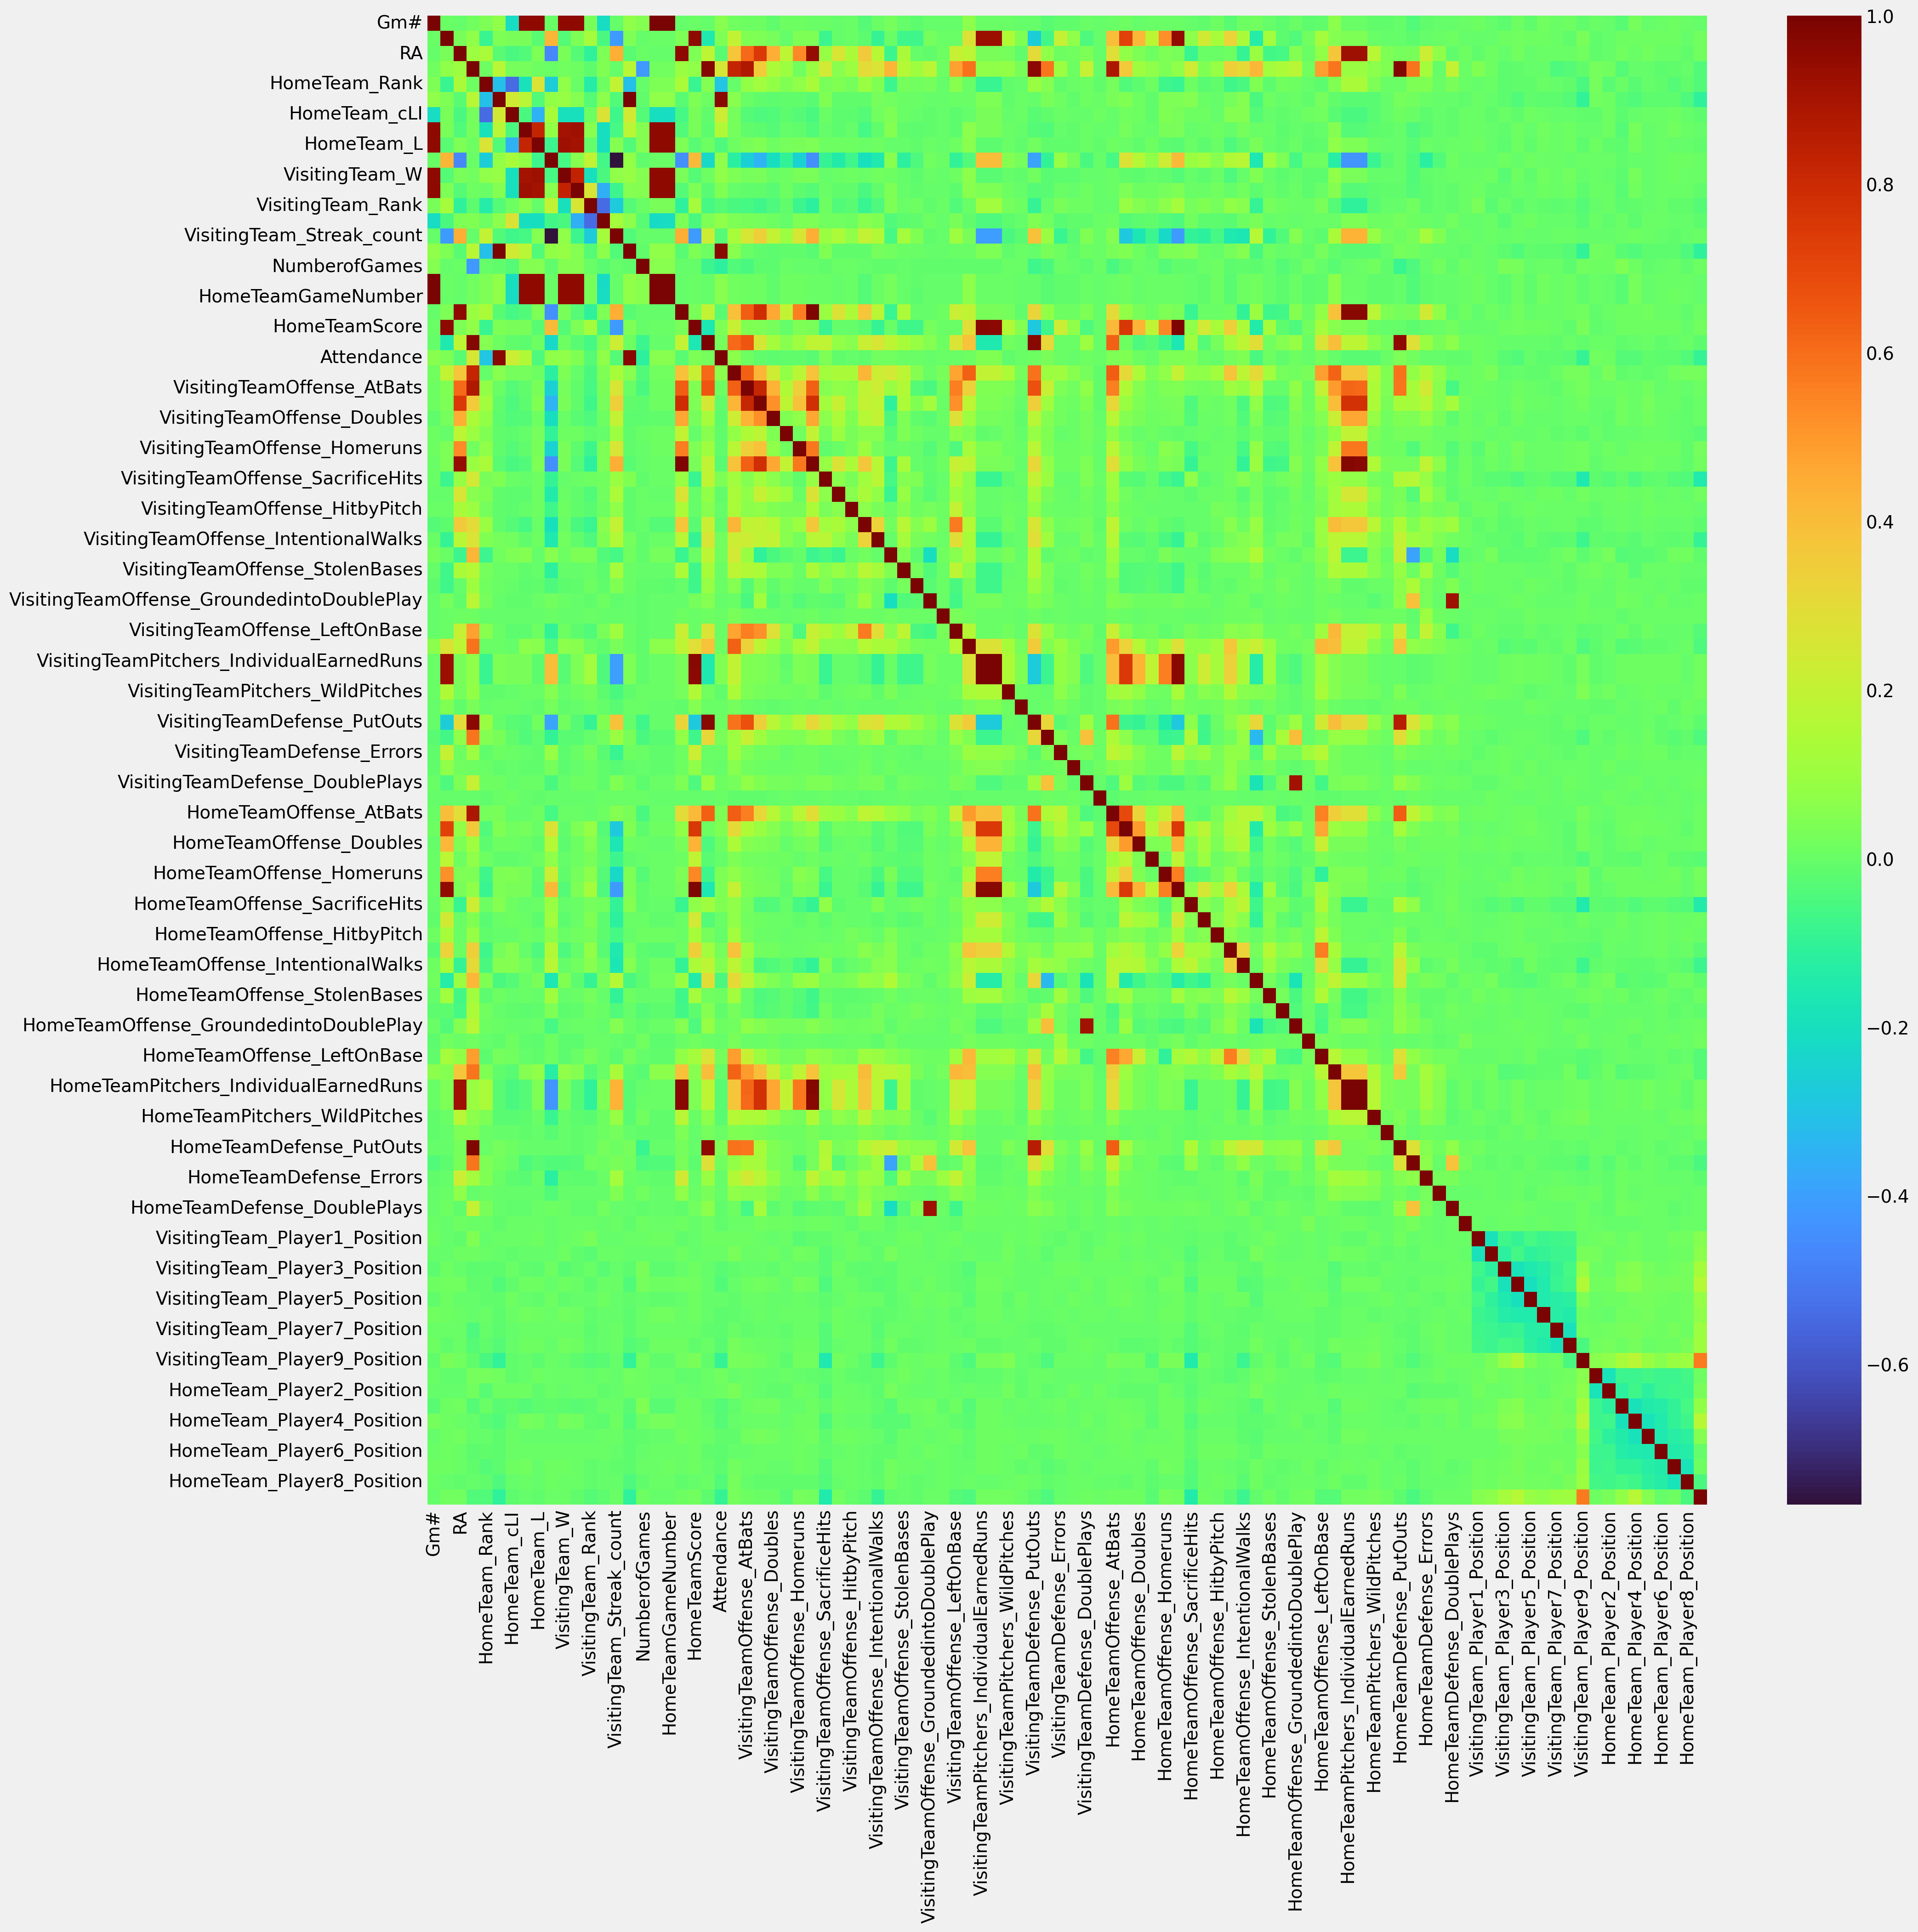

In [7]:
corr = df_features.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)

In [8]:
df_features['HomeTeam_Player9_Position'].max()

10

In [9]:
df_features['VisitingTeam_Player9_Position'].min()

1

Attendance_TRUTH_x                  0.996052
Attendance                          0.984634
HomeTeam_Rank                       0.315608
HomeTeam_cLI                        0.253595
HomeTeam_W                          0.164710
Inn                                 0.144223
HomeTeam_Player9_Position           0.126747
VisitingTeam_Player9_Position       0.125761
VisitingTeam_W                      0.083346
HomeTeam_Streak_count               0.068524
VisitingTeamGameNumber              0.068014
HomeTeamGameNumber                  0.067940
Gm#                                 0.067939
VisitingTeam_L                      0.056173
VisitingTeam_cLI                    0.054129
LengthofGame                        0.052719
HomeTeamOffense_Strickouts          0.052194
HomeTeamOffense_SacrificeHits       0.050165
HomeTeamOffense_IntentionalWalks    0.048215
VisitingTeam_Streak_count           0.046295
Name: Attendance_TRUTH_y, dtype: float64

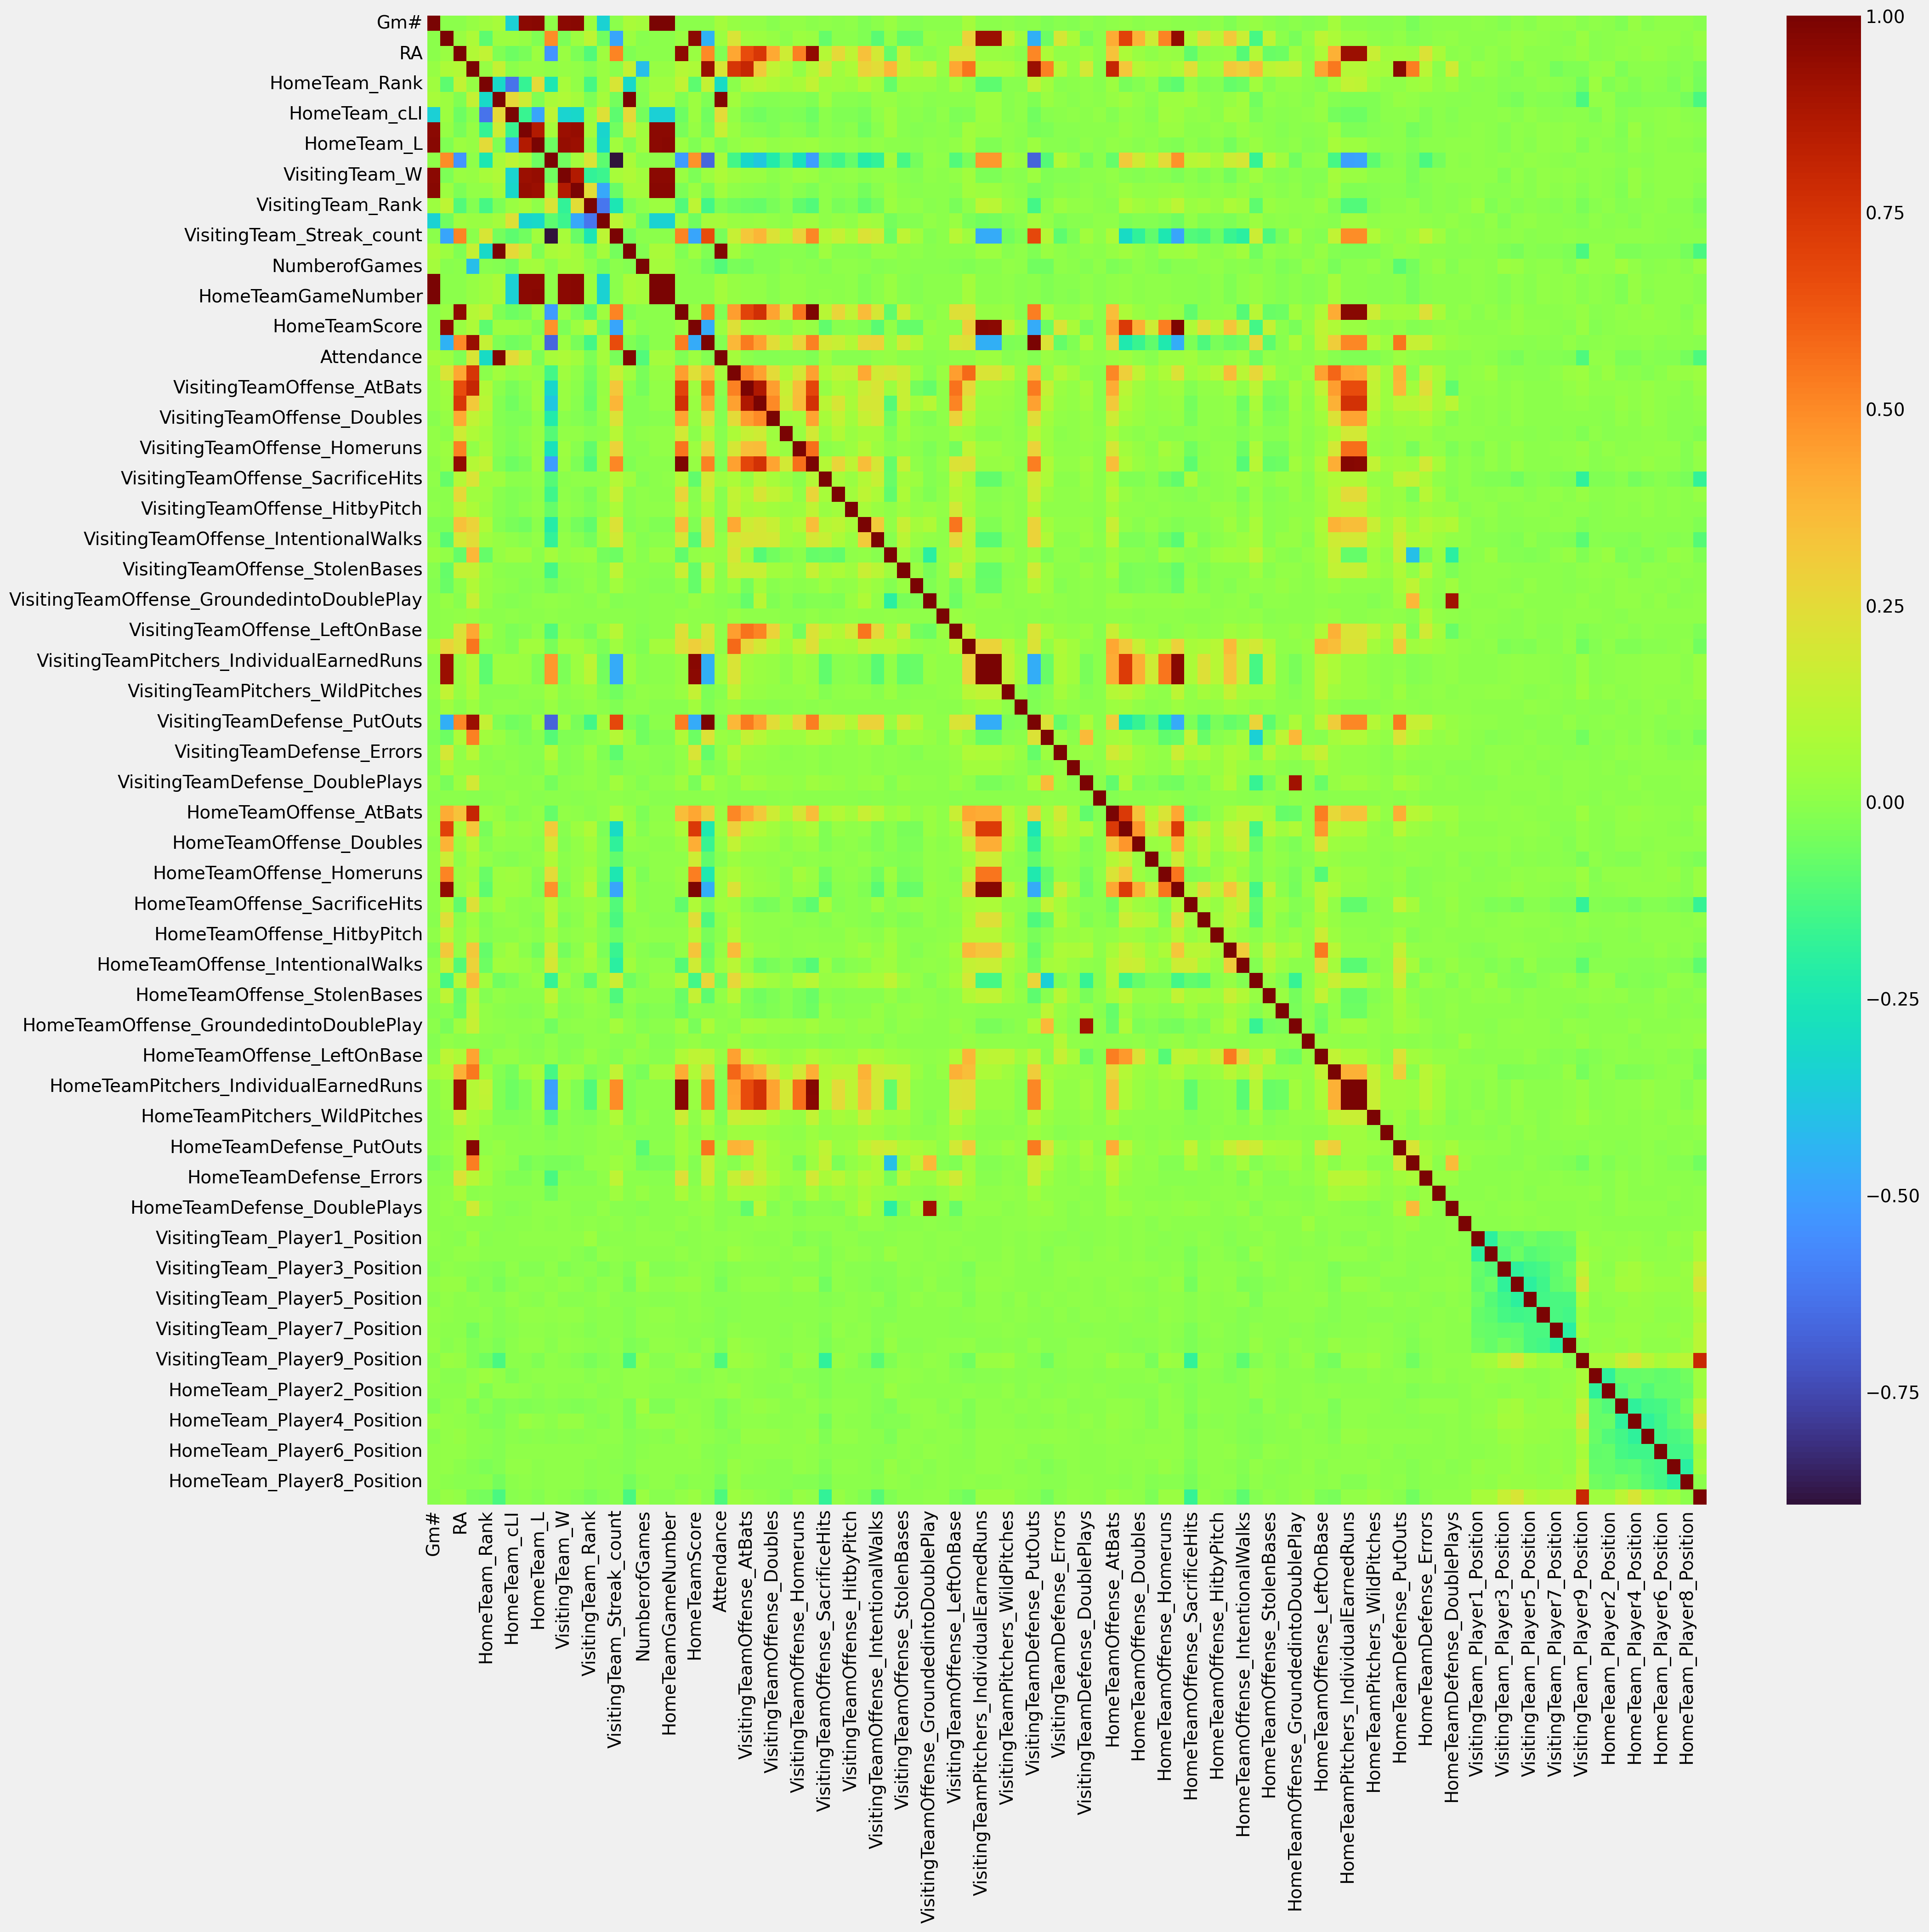

In [10]:
# spearman correlations - monotonic relationships
corr = df_features.select_dtypes(['int', 'float']).corr(method='spearman')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)
# filter by top 20 strongest pearson correlations with attendance excluding attendance with itself
display(corr.loc[corr.index != 'Attendance_TRUTH_y', 'Attendance_TRUTH_y'].abs().sort_values(ascending=False).iloc[:20])

In [40]:
s_correlated_features = corr.loc[corr.index != 'Attendance_TRUTH_y', 'Attendance_TRUTH_y'] \
                          .abs().sort_values(ascending=False).iloc[:20].index.to_numpy()
s_correlated_features

array(['avg_attendance_1_yr_ago', 'avg_attendance_2_yr_ago',
       'avg_attendance_3_yr_ago', 'HomeTeam_Rank', 'Stadium_Capacity',
       'HomeTeam_cLI', 'HomeTeam_W', 'W', 'HomeTeamLeague',
       'HomeTeam_Player9_Position', 'VisitingTeam_Player9_Position',
       'VisitingTeamLeague', 'DayNight', 'VisitingTeam_W',
       'HomeTeam_Streak_count', 'Streak_count',
       'HomeTeam_StartingPitcher_ID', 'LengthofGame',
       'VisitingTeamGameNumber', 'season'], dtype=object)

In [41]:
# find intersection of pearson and spearman correlations for linear regression features
p = set(p_correlated_features)
s = set(s_correlated_features)
features = list(p.intersection(s))
features = np.array(features)

In [42]:
features

array(['avg_attendance_2_yr_ago', 'VisitingTeam_W',
       'HomeTeam_Streak_count', 'VisitingTeamLeague',
       'avg_attendance_1_yr_ago', 'HomeTeam_Player9_Position', 'DayNight',
       'LengthofGame', 'VisitingTeamGameNumber', 'HomeTeam_cLI',
       'Stadium_Capacity', 'HomeTeam_W', 'HomeTeam_StartingPitcher_ID',
       'HomeTeamLeague', 'VisitingTeam_Player9_Position', 'Streak_count',
       'avg_attendance_3_yr_ago', 'W', 'HomeTeam_Rank'], dtype='<U29')

In [43]:
p_correlated_features

array(['avg_attendance_1_yr_ago', 'avg_attendance_2_yr_ago',
       'avg_attendance_3_yr_ago', 'Stadium_Capacity', 'HomeTeam_Rank',
       'HomeTeam_cLI', 'HomeTeam_W', 'W', 'HomeTeamLeague',
       'HomeTeam_Player9_Position', 'VisitingTeam_Player9_Position',
       'VisitingTeamLeague', 'DayNight', 'Streak_count',
       'HomeTeam_Streak_count', 'VisitingTeam_W',
       'HomeTeam_StartingPitcher_ID', 'VisitingTeam_cLI', 'LengthofGame',
       'VisitingTeamGameNumber'], dtype=object)